In [11]:
# sklearn necesita una version de numpy anterior a numpy 2
!pip install "numpy<2"
!pip install "opencv-python"
!pip install "scikit-learn"
!pip install "seaborn"

import cv2
import os
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [67]:
# función para cargar las imagenes de entrenamiento
def cargar_datos(data_dir):
    X = []
    y = []
    for class_name in ['margaritas', 'lirios', 'rosas']:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = Image.open(file_path).convert('L')  # Convert to grayscale
            image = image.resize((64, 64))  # Resize to a fixed size
            image = np.array(image).flatten()  # Flatten the image
            X.append(image)
            y.append(class_name)
    return np.array(X), np.array(y)

# Carga los datos, x tiene los datos y y tiene las etiquetas (los )
data_dir = 'imagenes'
x, y = cargar_datos(data_dir)

# los valores de los pixeles se hacen mas pequenos para aumentar la precision
#x = x / 255.0
x = x.astype('float32') / 255.0

In [68]:
# Codifica las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dicide los datos entre los de entrenamiento y los de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
# creacion y entrenamiento del modelo (AFTER JUVENTINO)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

k_range = range(1, 15)
scores = []

print("Iniciando la Optimización de K con Validación Cruzada (CV=5)...")

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross_val_score evalúa el modelo K-NN con el valor de K actual
    # usando validación cruzada con 5 pliegues (cv=5) para una evaluación robusta.
    score = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    scores.append(score.mean())

# Encontrar el mejor K y su precisión
best_k_index = np.argmax(scores)
best_k = k_range[best_k_index]
best_cv_accuracy = max(scores) * 100

print(f"\nOPTIMIZACIÓN COMPLETADA.")
print(f"==================================================")
print(f"El MEJOR valor de K encontrado es: {best_k}")
print(f"Precisión media más alta (CV): {best_cv_accuracy:.2f}%")
print(f"==================================================")

# --- ENTRENAMIENTO Y EVALUACIÓN FINAL CON EL MEJOR K ---

# 1. Creamos el modelo final con el mejor K
knn_final_model = KNeighborsClassifier(n_neighbors=best_k)

# 2. Entrenamos el modelo final con todo el conjunto de entrenamiento
knn_final_model.fit(x_train, y_train)

# 3. Hacemos predicciones en el conjunto de prueba (x_test)
y_pred = knn_final_model.predict(x_test)

Iniciando la Optimización de K con Validación Cruzada (CV=5)...

OPTIMIZACIÓN COMPLETADA.
El MEJOR valor de K encontrado es: 6
Precisión media más alta (CV): 60.00%


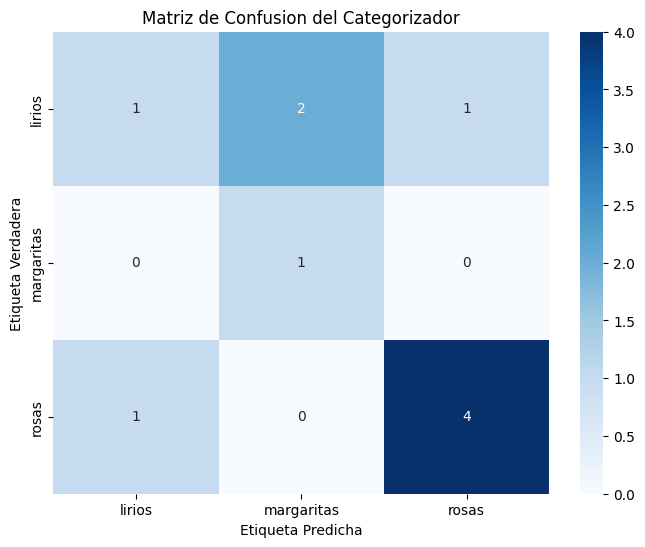

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# calculamos nuestra matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# recuperamos los nombres originales de las clases (para visualizacion de los datos)
class_names = label_encoder.classes_ 

# visualizamos la matriz de confusion usando un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusion del Categorizador')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()
